<a href="https://colab.research.google.com/github/ParineetaDeb/ParineetaDeb/blob/main/DALAB_END_SEMESTER_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1. Compute and Compare mean, median, mode between X1 and X2 using a Pie Chart**

Calculated Central Tendency Metrics:
          X1   X2
Mean    12.4  4.9
Median   5.0  7.0
Mode     5.0  7.0
------------------------------


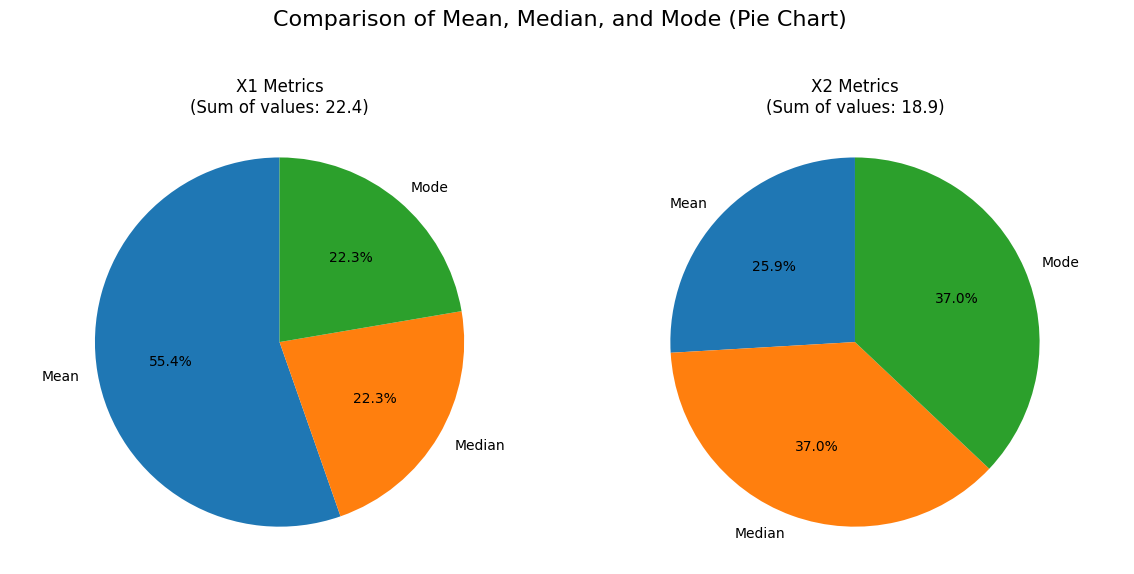

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1. Defining the datasets
X1 = [5, 8, 5, 90, 5, 5, -80, 80, 5, 1]
X2 = [7, 4, 110, 9, 9, 4, 7, -110, 2, 7]

s1 = pd.Series(X1)
s2 = pd.Series(X2)

# 2. Calculate Mean, Median, Mode
data = {
    'X1': {
        'Mean': s1.mean(),
        'Median': s1.median(),
        # Get the first mode. .mode() returns a Series of all modes.
        'Mode': s1.mode().iloc[0] if not s1.mode().empty else np.nan
    },
    'X2': {
        'Mean': s2.mean(),
        'Median': s2.median(),
        'Mode': s2.mode().iloc[0] if not s2.mode().empty else np.nan
    }
}

df_metrics = pd.DataFrame(data)

print("Calculated Central Tendency Metrics:")
print(df_metrics)
print("-" * 30)

# 3. Prepare data for Pie Charts
labels = df_metrics.index.tolist()
values_X1 = df_metrics['X1'].tolist()
values_X2 = df_metrics['X2'].tolist()

# 4. Create the Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of Mean, Median, and Mode (Pie Chart)', fontsize=16)

# Pie Chart for X1
axes[0].pie(values_X1, labels=labels, autopct='%.1f%%', startangle=90)
axes[0].set_title(f'X1 Metrics\n(Sum of values: {df_metrics["X1"].sum():.1f})')
axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie Chart for X2
axes[1].pie(values_X2, labels=labels, autopct='%.1f%%', startangle=90)
axes[1].set_title(f'X2 Metrics\n(Sum of values: {df_metrics["X2"].sum():.1f})')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# 5. Save/Display the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.savefig('central_tendency_comparison_pie_chart.png')
# In a Colab environment, plt.show() is often used for display.
# But since the goal is to save the file, savefig is used.

# **Q2. Draw a Box-Whisker Plot to analyze the Skewness of each independent variable**

/tmp/ipython-input-3727821801.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot, labels=labels, vert=True, patch_artist=True)


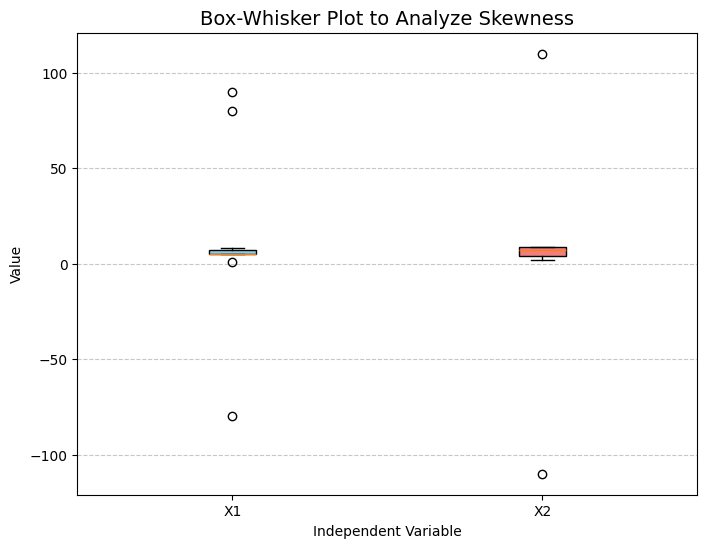

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#1 Defining the datasets
X1 = [5, 8, 5, 90, 5, 5, -80, 80, 5, 1]
X2 = [7, 4, 110, 9, 9, 4, 7, -110, 2, 7]

# Combine data into a list of arrays for plotting
data_to_plot = [X1, X2]
labels = ['X1', 'X2']

# 2. Generate the Box Plot
plt.figure(figsize=(8, 6))

# vert=True for vertical boxes. patch_artist=True allows box coloring.
box_plot = plt.boxplot(data_to_plot, labels=labels, vert=True, patch_artist=True)

plt.title('Box-Whisker Plot to Analyze Skewness', fontsize=14)
plt.ylabel('Value')
plt.xlabel('Independent Variable')

# Color the boxes for better visibility
colors = ['skyblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# 3. Save the figure
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('box_whisker_plot.png')
# plt.show() # Uncomment for Colab display

# Q3. Normalize a feature using decimal-scaling method and show the preprocessed dataset.

In [3]:
import numpy as np
import pandas as pd
import math

# 1. Define the datasets
X1 = [5, 8, 5, 90, 5, 5, -80, 80, 5, 1]
X2 = [7, 4, 110, 9, 9, 4, 7, -110, 2, 7]

# Function for Decimal Scaling Normalization
def decimal_scaling_normalize(data):
    # Calculate the maximum absolute value
    max_abs = np.abs(data).max()

    # Determine j: j is the smallest integer such that 10^j > max_abs.
    # This is calculated using ceil(log10(max_abs)).
    if max_abs == 0:
        j = 1
    else:
        j = math.ceil(math.log10(max_abs + 1e-10))
        j = int(j)

    scaling_factor = 10**j

    # Apply the normalization
    normalized_data = data / scaling_factor

    return normalized_data, scaling_factor, max_abs

# 2. Normalize X1 and X2
X1_array = np.array(X1)
X2_array = np.array(X2)

X1_normalized, X1_factor, X1_max_abs = decimal_scaling_normalize(X1_array)
X2_normalized, X2_factor, X2_max_abs = decimal_scaling_normalize(X2_array)

# 3. Display the preprocessed dataset
df_normalized = pd.DataFrame({
    'X1_Original': X1,
    'X1_Normalized': X1_normalized,
    'X2_Original': X2,
    'X2_Normalized': X2_normalized
})

print(f"Decimal Scaling Factor for X1 (max_abs={X1_max_abs}): 10^{int(np.log10(X1_factor))} = {X1_factor}")
print(f"Decimal Scaling Factor for X2 (max_abs={X2_max_abs}): 10^{int(np.log10(X2_factor))} = {X2_factor}")
print("-" * 60)
print("Preprocessed Dataset (Decimal-Scaling Normalization):")
print(df_normalized.to_string())

# Save the DataFrame to CSV (useful in Colab)
df_normalized.to_csv('normalized_dataset.csv', index=False)

Decimal Scaling Factor for X1 (max_abs=90): 10^2 = 100
Decimal Scaling Factor for X2 (max_abs=110): 10^3 = 1000
------------------------------------------------------------
Preprocessed Dataset (Decimal-Scaling Normalization):
   X1_Original  X1_Normalized  X2_Original  X2_Normalized
0            5           0.05            7          0.007
1            8           0.08            4          0.004
2            5           0.05          110          0.110
3           90           0.90            9          0.009
4            5           0.05            9          0.009
5            5           0.05            4          0.004
6          -80          -0.80            7          0.007
7           80           0.80         -110         -0.110
8            5           0.05            2          0.002
9            1           0.01            7          0.007


# **Q4. Select a feature X1 or X2 using Fisher Discriminant Ratio and verify it with the HeatMap Plot.**

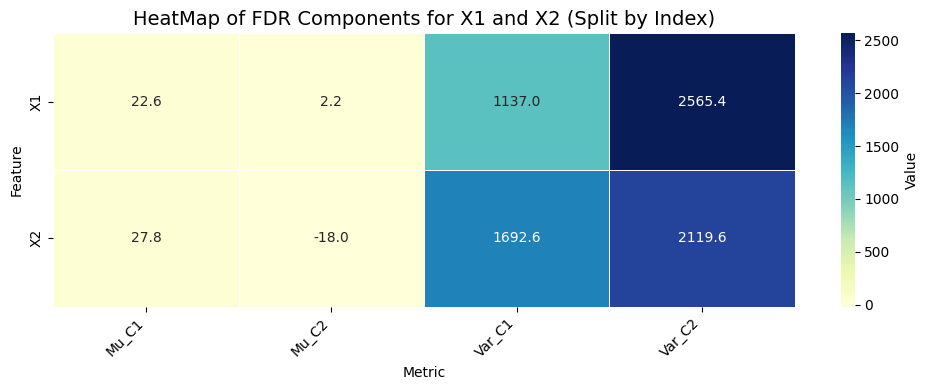

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the datasets
X1 = np.array([5, 8, 5, 90, 5, 5, -80, 80, 5, 1])
X2 = np.array([7, 4, 110, 9, 9, 4, 7, -110, 2, 7])

# 2. Assumption: Split into two classes (C1 and C2) for FDR calculation
split_idx = 5
X1_C1 = X1[:split_idx]
X1_C2 = X1[split_idx:]
X2_C1 = X2[:split_idx]
X2_C2 = X2[split_idx:]

# Function to calculate mean and population variance
def calculate_metrics(data_c1, data_c2):
    # Calculate means
    mu1 = np.mean(data_c1)
    mu2 = np.mean(data_c2)

    # Calculate population variance (np.var uses N in the denominator)
    var1 = np.var(data_c1)
    var2 = np.var(data_c2)

    # Calculate Fisher Discriminant Ratio (FDR)
    fdr = (mu1 - mu2)**2 / (var1 + var2)

    return mu1, mu2, var1, var2, fdr

# 3. Calculate metrics and FDR
mu1_X1, mu2_X1, var1_X1, var2_X1, fdr_X1 = calculate_metrics(X1_C1, X1_C2)
mu1_X2, mu2_X2, var1_X2, var2_X2, fdr_X2 = calculate_metrics(X2_C1, X2_C2)

# 4. Create DataFrame for HeatMap Plot (Verification)
heatmap_data = pd.DataFrame({
    'Metric': ['Mu_C1', 'Mu_C2', 'Var_C1', 'Var_C2'],
    'X1': [mu1_X1, mu2_X1, var1_X1, var2_X1],
    'X2': [mu1_X2, mu2_X2, var1_X2, var2_X2]
})
heatmap_data.set_index('Metric', inplace=True)
heatmap_data = heatmap_data.T

# 5. Generate the HeatMap Plot
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Value'})
plt.title('HeatMap of FDR Components for X1 and X2 (Split by Index)', fontsize=14)
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('fdr_heatmap.png')
# plt.show() # Uncomment for Colab display